# Data Preparation Exercises

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

### Acquire

In [2]:
df = get_store_data()
df.head(3)

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [3]:
df.shape # number of rows and columns

(913000, 14)

In [4]:
df.isnull().sum() # number null values in each column

sale_amount      0
sale_date        0
sale_id          0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
dtype: int64

In [5]:
df.store_id.unique() # unique values of  store_id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [7]:
df.sale_date.nunique() # number of unique sales dates

1826

In [8]:
df.sale_date.min(), df.sale_date.max()

('Fri, 01 Apr 2016 00:00:00 GMT', 'Wed, 31 May 2017 00:00:00 GMT')

In [9]:
df.sale_amount.describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sale_amount, dtype: float64

### Prepare

### 1. Convert date column to datetime format.

In [10]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

In [11]:
df.head()

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,2013-01-01 00:00:00+00:00,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,2013-01-02 00:00:00+00:00,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,2013-01-03 00:00:00+00:00,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,13.0,2013-01-04 00:00:00+00:00,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,10.0,2013-01-05 00:00:00+00:00,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [12]:
df.shape[0], df.sale_id.nunique()

(913000, 913000)

### Plot Target Variable Over Time

<AxesSubplot:xlabel='sale_date'>

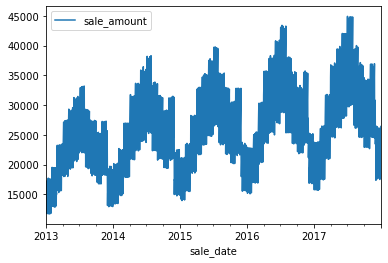

In [13]:
by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()
by_date.plot(x='sale_date', y='sale_amount')

In [14]:
df.store_id.value_counts()

# Number of observations per store = number of item-transactions per store.

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store_id, dtype: int64

In [15]:
df.item_id.value_counts().sort_index()

# It looks like both items and stores are equally represented, that is, 
# each store shows up the same number of times and so does each item.

1     18260
2     18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
24    18260
25    18260
26    18260
27    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
38    18260
39    18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
50    18260
Name: item_id, dtype: int64

### 2. Plot the distribution of sale_amount and item_price.

<AxesSubplot:>

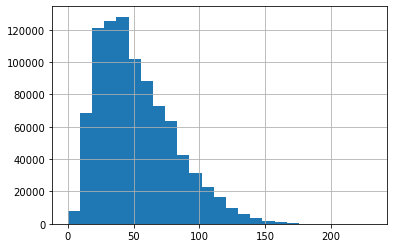

In [16]:
df.sale_amount.hist(bins=25)

<AxesSubplot:>

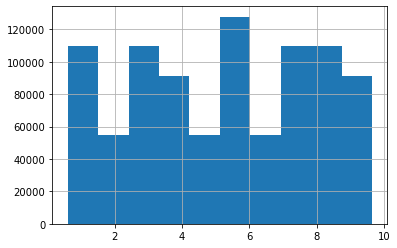

In [17]:
df.item_price.hist()

### 3. Set the index to be the datetime variable.


In [18]:
# Sort rows by the date and then set the index as that date

df = df.set_index("sale_date").sort_index()

### 4. Add a 'month' and 'day of week' column to your dataframe.

In [19]:
df['month'] = df.index.month
df['week']  = df.index.isocalendar().week

### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [20]:
df['sale_total'] = df.sale_amount * df.item_price

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.